# Importando Bibliotecas

In [1]:
import pandas as pd
import gdown
import matplotlib.pyplot as plt
import numpy as np 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

## Baixando dataset

In [4]:
url = 'https://drive.google.com/file/d/1UclkCZlhbNXuw4Vv4JKBMh9UoZPZpHTE/view?usp=sharing'
# output = '../date/Mall_Customers.csv'
output = "Mall_Customers.csv"
gdown.download(url=url, output=output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1UclkCZlhbNXuw4Vv4JKBMh9UoZPZpHTE
To: /home/willliam/Work/pessoal/Shopping_Customer_Clustering/Notebooks/Mall_Customers.csv
100%|██████████| 3.98k/3.98k [00:00<00:00, 4.22MB/s]


'Mall_Customers.csv'

## Importando dados

In [4]:
# Dados Locais baixado do repositorio
data = pd.read_csv('../data/Mall_Customers.csv')

# Dados via colab 
# df = pd.read_csv('Mall_Customers.csv')

print(f"{'-'*20} INFORMAÇÕES SOBRE O DATAFRAME {'-'*20}")
data.info()
print(f"{'-'*32} HEAD {'-'*33}")
data.head()

-------------------- INFORMAÇÕES SOBRE O DATAFRAME --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
-------------------------------- HEAD ---------------------------------


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Pré-processamento dos dados

In [5]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Aplicação dos algoritmos

### Kmeans

In [6]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans_labels = kmeans.fit_predict(X_scaled)

### Visualização dos clusters K-Means 

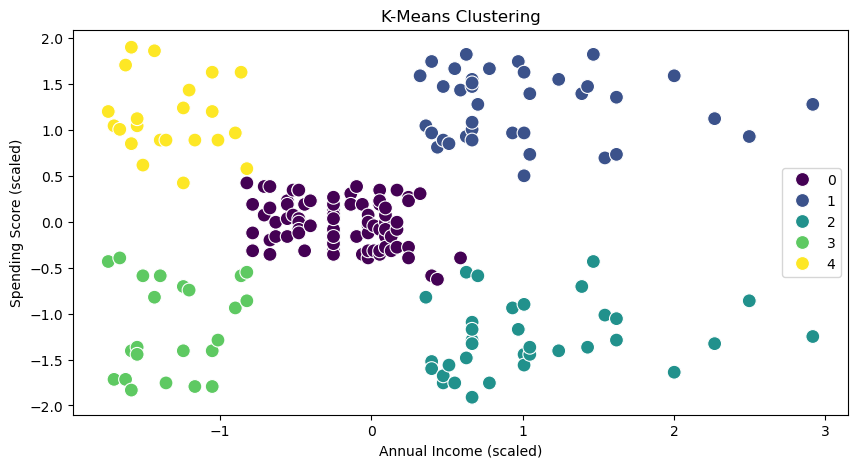

In [7]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='viridis', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()

## Agglomerative Clustering

In [8]:
agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_labels = agg_clustering.fit_predict(X_scaled)

## Visualização dos clusters Agglomerative Clustering

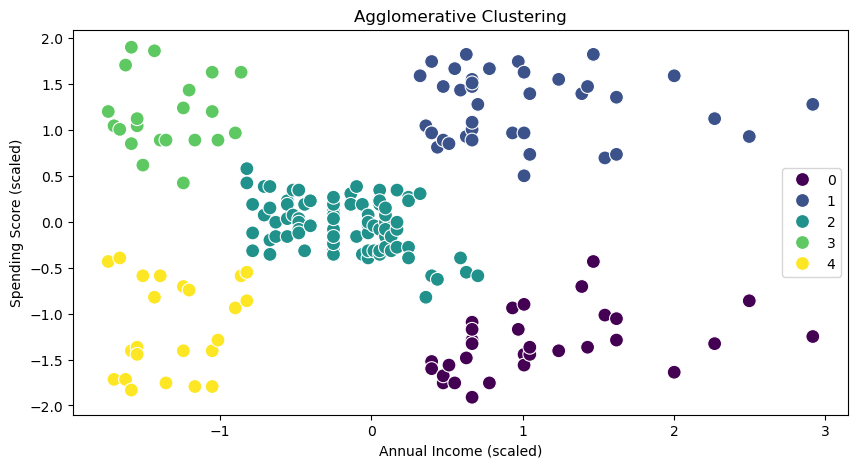

In [9]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=agg_labels, palette='viridis', s=100)
plt.title('Agglomerative Clustering')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()

### Avaliação dos clusters

In [10]:
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(X_scaled, kmeans_labels)

In [11]:
agg_silhouette = silhouette_score(X_scaled, agg_labels)
agg_davies_bouldin = davies_bouldin_score(X_scaled, agg_labels)

In [12]:
results = {
    'Method': ['K-Means', 'Agglomerative Clustering'],
    'Silhouette Score': [kmeans_silhouette, agg_silhouette],
    'Davies-Bouldin Index': [kmeans_davies_bouldin, agg_davies_bouldin]
}

results_df = pd.DataFrame(results)
results_df

,Method,Silhouette Score,Davies-Bouldin Index
0,K-Means,0.554657,0.572236
1,Agglomerative Clustering,0.553809,0.577862
